In [1]:
import pickle
import sys
import csv
import random
sys.path.append(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project')
from execute_remote_scripts import *
# from Processing_Data.downsampling import *
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde
%load_ext autoreload
%autoreload 2
# from Server_Scripts.remote_processing_csv import *
from Processing_Data.EDA import *

# Enable LaTeX rendering
plt.rcParams.update({
    "text.usetex": False, 
    "font.family": "serif"
})

C:\Users\Max Tost\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Plotting data for inspection

In [2]:
base_path_re = r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\CSV_Files_RE'
files_re = os.listdir(base_path_re)

base_path_no_re = r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\CSV_Files_NO_RE'
files_no_re = os.listdir(base_path_no_re)
#files_re, files_no_re

# Setting which files from the folders to plot
n = 1
n_no = 3

# Loading them and switching sign of plasma current
data_re = pd.read_csv(os.path.join(base_path_re, files_re[n]))
data_re['IPLA'] = -data_re['IPLA']
data_no_re = pd.read_csv(os.path.join(base_path_no_re, files_no_re[n_no]))
data_no_re['IPLA'] = -data_no_re['IPLA']
data_re.keys(), files_re[n], data_no_re.keys(), files_no_re[n_no]

# Plotting
re, no_re = files_re[n].split('no')[1].split('.')[0], files_no_re[n].split('no')[1].split('.')[0]

# Also setting x limits correctly to see plots     -->                                                                                             #### Here
plot_jet_data(data_no_re, data_re, fr'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Processing_Data\RE{re}_NO_RE{no_re}.svg', (53.5, 54.6), (47.9, 48.5))

FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: 'C:\\Users\\Max Tost\\Desktop\\Notebooks\\SPC Neural Network Project\\CSV_Files_RE'

## Probability Density Functions of the Data

In [3]:
base_path = r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Data\CSV_Files_w_dtIP_conv'
files = os.listdir(base_path)
# Loading all csv files into a diciotnary
dataframes = {}
for file in files:
    dataframes[int(file.split('.')[0].split('no')[1])] = pd.read_csv(os.path.join(base_path, file))
    
RE_autom = list(pd.read_csv(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Data\automatic_RE_numbers.csv', header=None)[0])
RE_valid = list(pd.read_csv(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Data\validated_RE_numbers.csv', header=None)[0])

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [6]:
# Checking for NaNs and Infs and dropping them if necessary
check_nans_infs_pdf(dataframes, drop=True)

# Updating the shot lists
RE_autom = [shot for shot in RE_autom if shot in dataframes.keys()]
RE_valid = [shot for shot in RE_valid if shot in dataframes.keys()]
NO_RE_probably = [key for key in dataframes.keys() if key not in RE_autom and key not in RE_valid]

# Extracting the keys of the variables
features = list(dataframes[NO_RE_probably[0]].keys()) #to_numpy()
features.pop(features.index('time'))
features

DataFrame 80331: 4945 NaNs found. Dropping rows with NaNs.
DataFrame 80706: 4853 NaNs found. Dropping rows with NaNs.
DataFrame 80749: 5815 NaNs found. Dropping rows with NaNs.
DataFrame 80821: 4875 NaNs found. Dropping rows with NaNs.
DataFrame 80822: 4773 NaNs found. Dropping rows with NaNs.
DataFrame 80823: 4536 NaNs found. Dropping rows with NaNs.
DataFrame 80824: 4918 NaNs found. Dropping rows with NaNs.
DataFrame 80962: 4950 NaNs found. Dropping rows with NaNs.
DataFrame 80972: 5797 NaNs found. Dropping rows with NaNs.
DataFrame 80974: 5945 NaNs found. Dropping rows with NaNs.
DataFrame 80976: 4894 NaNs found. Dropping rows with NaNs.
DataFrame 81197: 4431 NaNs found. Dropping rows with NaNs.
DataFrame 81200: 4421 NaNs found. Dropping rows with NaNs.
DataFrame 81203: 4471 NaNs found. Dropping rows with NaNs.
DataFrame 81228: 4956 NaNs found. Dropping rows with NaNs.
DataFrame 81469: 4871 NaNs found. Dropping rows with NaNs.
DataFrame 81547: 4976 NaNs found. Dropping rows with NaN

['SSXcore', 'IPLA', 'DAO_EDG7', 'WMHD', 'RNT', 'DAI_EDG7', 'ECE_PF', 'dtIPLA']

In [11]:
# Getting the normalised PDFs
RE_features_extrema, RE_features_densities = compute_feature_statistics(dataframes, RE_valid, features)
NO_RE_features_extrema, NO_RE_features_densities = compute_feature_statistics(dataframes, NO_RE_probably, features) 

DataFrame '85454' is empty for feature 'SSXcore'.
DataFrame '85483' is empty for feature 'SSXcore'.
DataFrame '90966' is empty for feature 'SSXcore'.
DataFrame '91572' is empty for feature 'SSXcore'.
DataFrame '91636' is empty for feature 'SSXcore'.
DataFrame '92363' is empty for feature 'SSXcore'.
DataFrame '94342' is empty for feature 'SSXcore'.
DataFrame '95054' is empty for feature 'SSXcore'.
DataFrame '95107' is empty for feature 'SSXcore'.
DataFrame '98054' is empty for feature 'SSXcore'.
DataFrame '98096' is empty for feature 'SSXcore'.
DataFrame '85454' is empty for feature 'IPLA'.
DataFrame '85483' is empty for feature 'IPLA'.
DataFrame '90966' is empty for feature 'IPLA'.
DataFrame '91572' is empty for feature 'IPLA'.
DataFrame '91636' is empty for feature 'IPLA'.
DataFrame '92363' is empty for feature 'IPLA'.
DataFrame '94342' is empty for feature 'IPLA'.
DataFrame '95054' is empty for feature 'IPLA'.
DataFrame '95107' is empty for feature 'IPLA'.
DataFrame '98054' is empty 

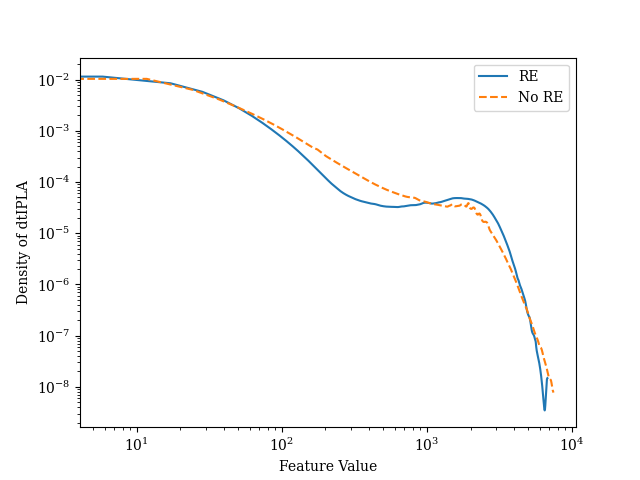

In [16]:
# Plotting and saving them all (log scale optional)
plt.close()
for feature in features:
    plt.close()
    plt.plot(RE_features_densities[feature][0], RE_features_densities[feature][1], label='RE')
    plt.plot(NO_RE_features_densities[feature][0], NO_RE_features_densities[feature][1], '--', label='No RE')
    plt.xlabel('Feature Value')
    plt.ylabel(f'Density of {feature}')
    plt.legend()
    plt.loglog()
    plt.savefig(fr'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Processing_Data\PDFs\Feature_Density_{feature}_loglog.png')

## Comparing original data with downsampled data

In [14]:
file_original = load_pickle(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Data\20_random_JET_data.pkl')
original_data = file_original['JETno85000']
downsampled_data = pd.read_csv(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\CSV_Files\JETno85000.csv') # These data are downsampled while downloaded

In [16]:
shot=original_data
SSX = shot['SSXcore']
t_b = shot['Ramp_up'][0]
t_e = shot['Ramp_down'][1]
original_time = SSX['time'][(SSX['time'] >= t_b) & (SSX['time'] <= t_e)]
original_data = SSX['signal'][(SSX['time'] >= t_b) & (SSX['time'] <= t_e)]
print(t_b, t_e)

40.917400001490115 59.467300001490116


In [19]:
plt.close()
plt.plot(original_time, original_data)
plt.plot(downsampled_data['time'], downsampled_data['SSXcore'], '-')
plt.show()

<IPython.core.display.Javascript object>

In [20]:
downsampled_data['time'][1]-downsampled_data['time'][0]

0.018568468499999824

In [22]:
original_time[10]-original_time[9]

3.999999999848569e-05